# Bilbiotecas

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Funções 

In [ ]:
def valores_plot(df,c,coluna): 
  valore_preto = df[(df['TP_COR_RACA'] == 0)].groupby(coluna)[c].mean()
  valores_branco   = df[(df['TP_COR_RACA'] == 1)].groupby(coluna)[c].mean()

  valores_preto_std = df[(df['TP_COR_RACA'] == 0)].groupby(coluna)[c].std().values
  valores_branco_std   = df[(df['TP_COR_RACA'] == 1)].groupby(coluna)[c].std().values

  print("Erro da medida") 
  print(valores_preto_std/df[(df['TP_COR_RACA'] == 0)].groupby(coluna).TP_COR_RACA.count())

  # intervalo de confiança
  print(valores_branco_std/df[(df['TP_COR_RACA'] == 1)].groupby(coluna).TP_COR_RACA.count())

  valores_preto_erro = valores_preto_std/df[(df['TP_COR_RACA'] == 0)].groupby(coluna).TP_COR_RACA.count()
  valores_branco_erro = valores_preto_std/df[(df['TP_COR_RACA'] == 1)].groupby(coluna).TP_COR_RACA.count()

  return valore_preto,valores_branco,valores_preto_erro,valores_branco_erro

def plot_comp (valore_preto,valores_branco,title):
  plt.rc('ytick', labelsize=14)
  plt.rc('xtick', labelsize=14)
  labels = ['Fêmea', 'Macho']
  x = np.arange(len(labels))  # the label locations
  width = 0.15  # the width of the bars

  fig, ax = plt.subplots(figsize=(10, 8))
  rects1 = ax.bar(x - width/2, valore_preto,width,label='Pretos',alpha =0.8)
  rects2 = ax.bar(x + width/2, valores_branco,width,label='Brancos',alpha = 0.8)

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel('Nota',fontsize = 16)
  ax.set_xlabel('Sexo',fontsize = 16)
  #ax.set_title(title,fontsize = 18)
  ax.set_xticks(x)
  ax.set_xticklabels(labels)
  ax.legend(fontsize = 14)

  def autolabel(rects):
      """Attach a text label above each bar in *rects*, displaying its height."""
      for rect in rects:
          height = rect.get_height()
          ax.annotate(np.format_float_positional(height,1),
                      xy=(rect.get_x() + rect.get_width() / 2, height),
                      xytext=(0, 3),  # 3 points vertical offset
                      textcoords="offset points", 
                      ha='center', va='bottom',size = 14)



  autolabel(rects1)
  autolabel(rects2)
  ax.set_ylim(0,800)
  fig.tight_layout()
  plt.show()




#  <a name="indice">  Índice </a>

* [1.0 Objetivo.](#secao_1.0)
* [2.0 Importação dos dados.](#secao_2.0)
* [3.0 Análises.](#secao_3.0)
  * [3.1 O desepenho dos homens e mulhueres mudão por cor/raça? .](#secao_3.1)
  * [3.2 Essa difenreça entre as notas dos homens e mulheres e causada por qual prova ?.](#secao_3.2)
  * [3.3 Como esta distribuido a porcentagem de alunos de raças se sexos diferentes ?.](#secao_3.3)
  * [3.4 O tipo de escola que a pessoa estudo afeta o seu desempenho ?.](#secao_3.4)
  * [3.5  Quanto maior a renda, maior o desempenho dos alunos.](#secao_3.5)   
  * [3.6 Escolaridade dos pais interfere na nota dos alunos?.](#secao_3.6)
  * [3.7  O acesso a internet e ao um computador influência nos estudos ?.](#secao_3.7)
  * [4.0  Conclusão.](#secao_4.0)





# <a name="secao_1.0"> 1. Objetivo </a>.

* Estas análises que serão vistas tem como objetivo entender o impacto dos fatores sociais e econômicos no desempenho do enem.
 
* O enfoque das análises será feito em nas vertentes: 

  * Sexo.
  * Raça.
  * Acesso a internet. 
  * Influência dos pais.

* Os plots que  foram escolhidos para ser apresentados no relatorio terá uma seção só para ele.

* As comparações que são feitas, seram realizadas atravez da medida de media e erro padrão. 

# <a name="secao_2.0"> 2. Importação dos dados </a>.

* Será importado o conjunto de dados que foi processado pelo notebook que foi denominado de **Tratamento dos dados**

In [ ]:
# importando os dados
df = pd.read_csv('/content/drive/My Drive/desafio semantix/dados1.csv',sep=';',encoding='iso-8859-1')

In [ ]:
df.head()  # Olhando a estrutura do dataset

,TP_SEXO,TP_COR_RACA,CO_ESCOLA,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q005,Q006,Q026,Nota_media
0,F,1,41026039.0,Apucarana,41.0,PR,4.0,618.2,744.7,636.3,713.7,900.0,4.0,4.0,2,2245.5,2,722.58
1,F,1,43013945.0,Alvorada,43.0,RS,2.0,430.4,466.8,515.9,394.1,580.0,4.0,1.0,3,0.0,1,477.44
2,F,0,35006713.0,Mogi das Cruzes,35.0,SP,2.0,371.8,501.4,518.6,442.0,660.0,4.0,5.5,3,499.0,1,498.76
3,M,0,29398673.0,Lauro de Freitas,29.0,BA,2.0,567.3,584.1,595.8,704.5,620.0,4.0,2.0,2,499.0,1,614.34
4,M,0,25099159.0,Santa Rita,25.0,PB,2.0,373.2,409.6,469.5,379.1,480.0,3.5,4.0,4,1247.5,1,422.28


# <a name="secao_3.0"> 3. Análise de dados </a>.

### <a name="secao_3.1"> 3.1  O desepenho dos homens e mulhueres mudão por cor/raça?  </a>.

Erro da medida
TP_SEXO
F    0.000256
M    0.000399
Name: TP_COR_RACA, dtype: float64
TP_SEXO
F    0.000432
M    0.000595
Name: TP_COR_RACA, dtype: float64


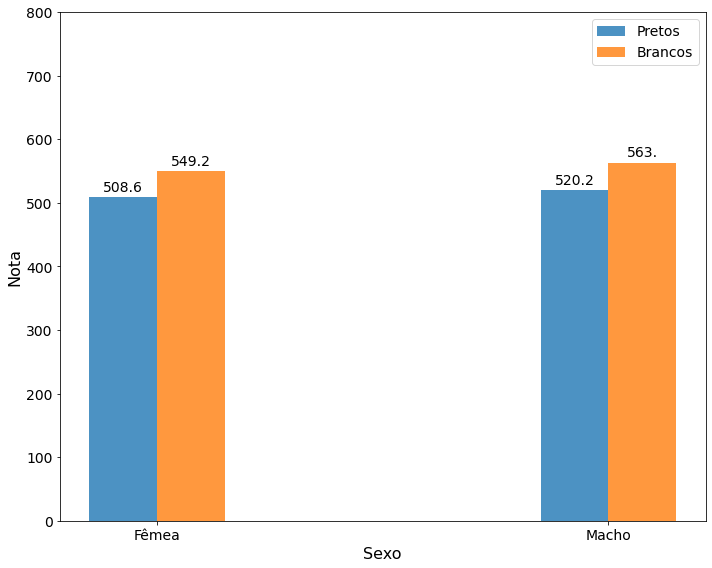

In [ ]:
valore_preto,valores_branco,valores_preto_erro,valores_branco_erro = valores_plot(df,'Nota_media','TP_SEXO')
plot_comp (valore_preto,valores_branco,'Nota_media')

In [ ]:
valores_branco

TP_SEXO
F    549.226807
M    562.965726
Name: Nota_media, dtype: float64

* Númericamente qual é a difenreça  entre os dados

In [ ]:
print('Diferença entre as mulheres de raças difentes           :',
      df['Nota_media'][(df['TP_SEXO'] == 'F') & (df['TP_COR_RACA'] == 1)].mean() - df['Nota_media'][(df['TP_SEXO'] == 'F') & (df['TP_COR_RACA'] == 0)].mean())

print('Diferença entre os homens de raças difentes             :',
      df['Nota_media'][(df['TP_SEXO'] == 'M') & (df['TP_COR_RACA'] == 1)].mean() - df['Nota_media'][(df['TP_SEXO'] == 'M') & (df['TP_COR_RACA'] == 0)].mean())




print('Diferença entre os homens e mulhres  de raça branca     :',
      df['Nota_media'][(df['TP_SEXO'] == 'M') & (df['TP_COR_RACA'] == 1)].mean() - df['Nota_media'][(df['TP_SEXO'] == 'F') & (df['TP_COR_RACA'] == 1)].mean())


print('Diferença entre os homens e mulhres  de raça preta      :',
      df['Nota_media'][(df['TP_SEXO'] == 'M') & (df['TP_COR_RACA'] == 0)].mean() - df['Nota_media'][(df['TP_SEXO'] == 'F') & (df['TP_COR_RACA'] == 0)].mean())


Diferença entre as mulheres de raças difentes           : 40.62639144969819
Diferença entre os homens de raças difentes             : 42.797869077221435
Diferença entre os homens e mulhres  de raça branca     : 13.73891888689343
Diferença entre os homens e mulhres  de raça preta      : 11.567441259370185


### <a name="secao_3.2"> 3.2  Essa diferença entre as notas dos homens e mulheres é causada por qual prova ?  </a>.

In [ ]:
col = ['NU_NOTA_CH','NU_NOTA_CN','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']

Erro da medida
TP_SEXO
F    0.000262
M    0.000402
Name: TP_COR_RACA, dtype: float64
TP_SEXO
F    0.000408
M    0.000566
Name: TP_COR_RACA, dtype: float64


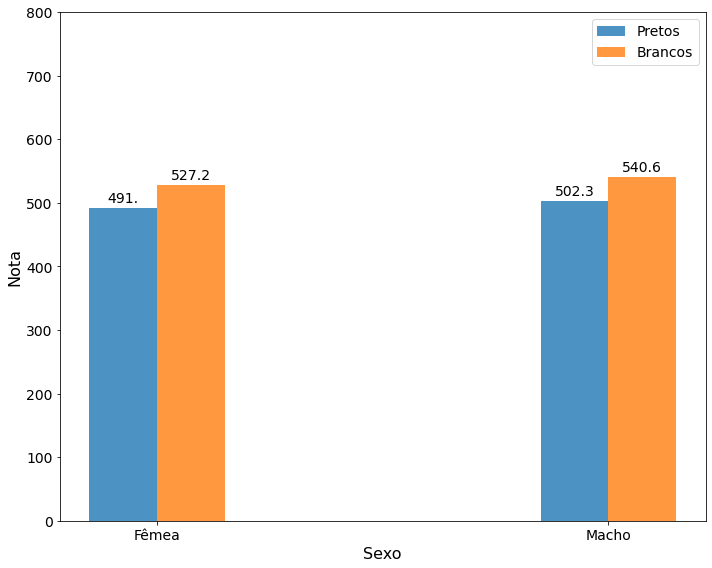

In [ ]:
valore_preto,valores_branco,valores_preto_std,valores_branco_std = valores_plot(df,col[0],'TP_SEXO')
plot_comp (valore_preto,valores_branco,'Ciências Humanas')

In [ ]:
valore_preto

TP_SEXO
F    490.964397
M    502.305356
Name: NU_NOTA_CH, dtype: float64

Erro da medida
TP_SEXO
F    0.000237
M    0.000369
Name: TP_COR_RACA, dtype: float64
TP_SEXO
F    0.000405
M    0.000560
Name: TP_COR_RACA, dtype: float64


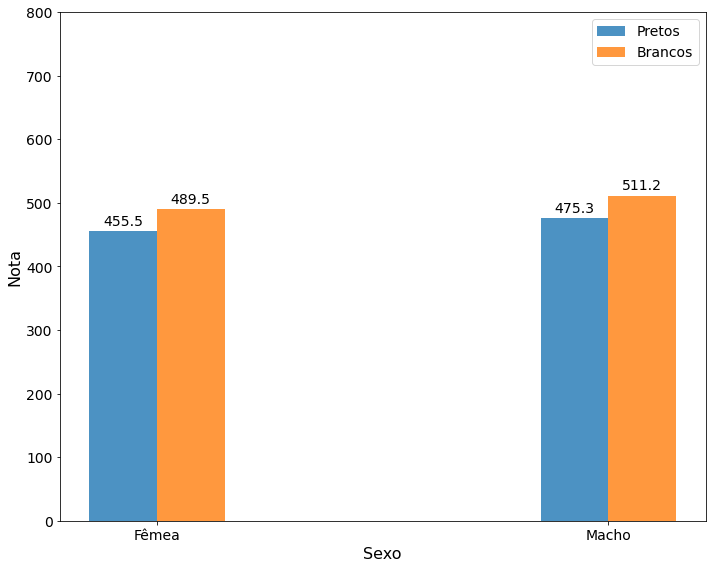

In [ ]:
valore_preto,valores_branco,valores_preto_std,valores_branco_std = valores_plot(df,col[1],'TP_SEXO')
plot_comp (valore_preto,valores_branco,'Ciências da Natureza')

In [ ]:
valore_preto

TP_SEXO
F    455.503705
M    475.296803
Name: NU_NOTA_CN, dtype: float64

Erro da medida
TP_SEXO
F    0.000318
M    0.000540
Name: TP_COR_RACA, dtype: float64
TP_SEXO
F    0.000579
M    0.000847
Name: TP_COR_RACA, dtype: float64


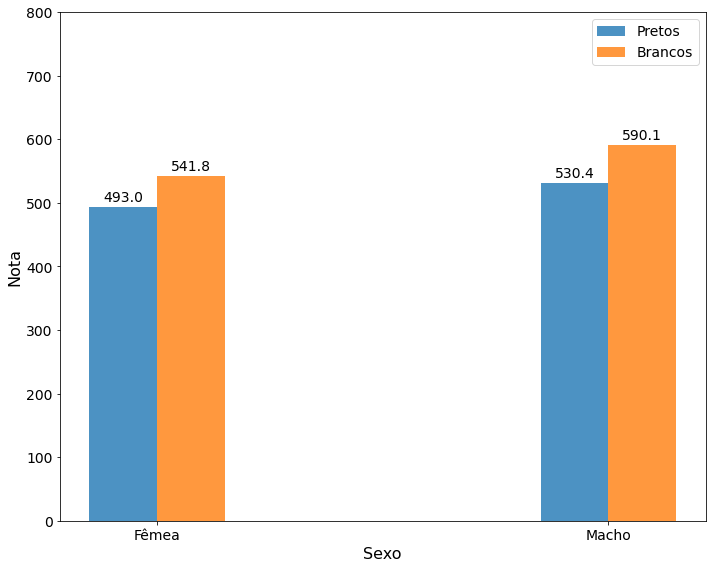

In [ ]:
valore_preto,valores_branco,valores_preto_std,valores_branco_std = valores_plot(df,col[3],'TP_SEXO')
plot_comp (valore_preto,valores_branco,'Linguagens e Códigos ')

In [ ]:
valore_preto

TP_SEXO
F    493.015613
M    530.408059
Name: NU_NOTA_MT, dtype: float64

Erro da medida
TP_SEXO
F    0.000318
M    0.000540
Name: TP_COR_RACA, dtype: float64
TP_SEXO
F    0.000579
M    0.000847
Name: TP_COR_RACA, dtype: float64


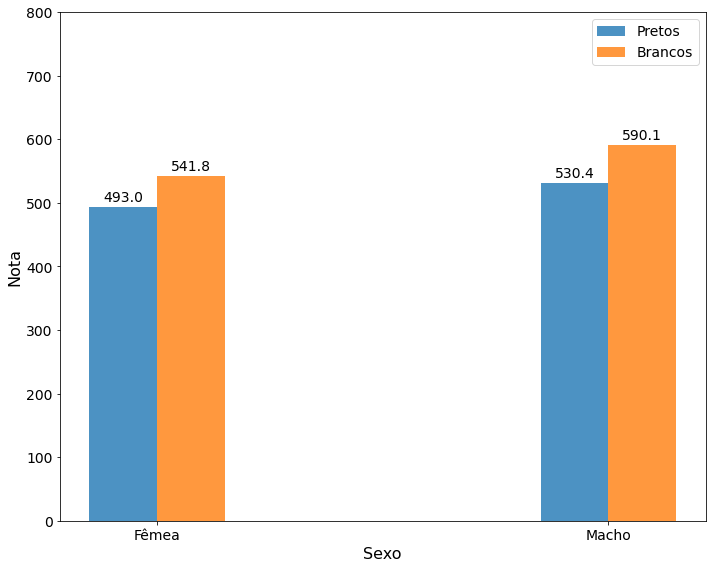

In [ ]:
valore_preto,valores_branco,valores_preto_std,valores_branco_std = valores_plot(df,col[3],'TP_SEXO')
plot_comp (valore_preto,valores_branco,'Matemática')

In [ ]:
valore_preto

TP_SEXO
F    493.015613
M    530.408059
Name: NU_NOTA_MT, dtype: float64

Erro da medida
TP_SEXO
F    0.000549
M    0.000789
Name: TP_COR_RACA, dtype: float64
TP_SEXO
F    0.000844
M    0.001111
Name: TP_COR_RACA, dtype: float64


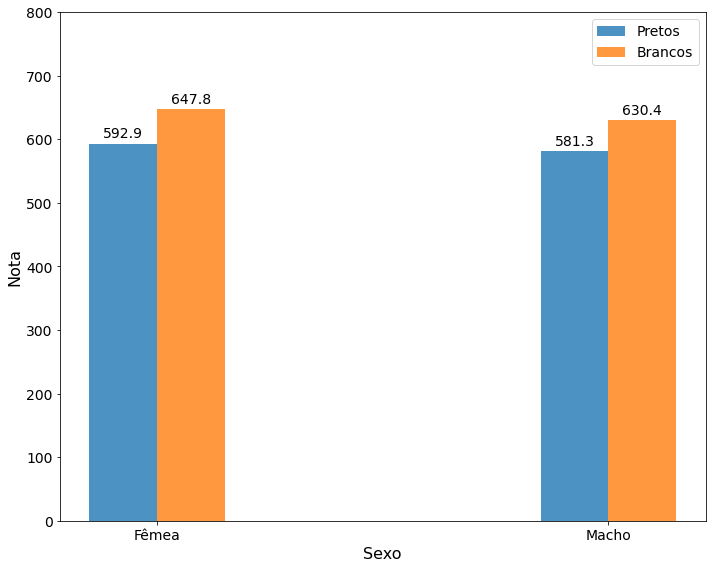

In [ ]:
valore_preto,valores_branco,valores_preto_std,valores_branco_std = valores_plot(df,col[4],'TP_SEXO')
plot_comp (valore_preto,valores_branco,'Redação')

* O principal fator que causa a diferença entre as notas dos alunos entre os homens e mulheres se dá por causa das provas de matemática e ciências da natureza. Este fator pode ser explicado pelo fato da desigualdade de gênero existente nos cursos de exatas onde a maioria é predominante homem.

* Também existem fatores ligados à criação, por exemplo meninos quando são mais novos brincam com brincadeiras que forçam desenvolver raciocínio lógico enquanto as meninas brincam coisas relacionadas ao cuidar de algo. Isso faz com que elas desenvolvam melhor habilidades de comunicação e expressão do que os dos homens, esse fator é um dos indícios que explica o porque as mulheres tiram notas melhores na redação do que os homens.
 

* Refêrencias para conclusão:     
    * https://www.virandobixo.com.br/noticias/NOT,0,0,1589938,mulheres+predominam+no+enem+mas+tem+nota+menor+que+homens.aspx

    * https://querobolsa.com.br/revista/homens-possuem-mais-facilidade-na-area-de-exatas-do-que-mulheres-informa-pesquisa

* Para ter uma visão melhor do desempenho dos alunos de sexos diferentes e raças diferentes,será plotado uma medida que mede o seguinte exemplo:
* Do total de alunos que são mulheres e brancas, quantas delas tiraram uma nota entre 900 a 100.
 * Lembrando que essas medidas seram feitas para todas variações de sexo e raça e o intevalo da nota será avaliado de 0 - 100, 100 - 200, 200 - 300 ...., 800 - 900, 900 - 1000.



### <a name="secao_3.3"> 3.3  Como esta distribuido a porcentagem de alunos de raças se sexos diferentes  ?  </a>.

In [ ]:
# para facilitar os calculos seram criado mais duas variáveis
ind = np.zeros(df.shape[0])

ind[df['Nota_media'] < 100]  = 0 

ind[(df['Nota_media'] >= 100) & (df['Nota_media'] < 200)] = 1 
ind[(df['Nota_media'] >= 200) & (df['Nota_media'] < 300)] = 2
ind[(df['Nota_media'] >= 300) & (df['Nota_media'] < 400)] = 3
ind[(df['Nota_media'] >= 400) & (df['Nota_media'] < 500)] = 4
ind[(df['Nota_media'] >= 500) & (df['Nota_media'] < 600)] = 5
ind[(df['Nota_media'] >= 600) & (df['Nota_media'] < 700)] = 6
ind[(df['Nota_media'] >= 700) & (df['Nota_media'] < 800)] = 7
ind[(df['Nota_media'] >= 800) & (df['Nota_media'] < 900)] = 8
ind[(df['Nota_media'] >= 900) & (df['Nota_media'] <= 1000)] = 9 

df['Intervalo_de_notas'] = ind

In [ ]:
ind = np.zeros(df.shape[0])

ind[(df['TP_SEXO'] == 'F') & (df['TP_COR_RACA'] == 0)] = 0   # Mulheres  negras
ind[(df['TP_SEXO'] == 'F') & (df['TP_COR_RACA'] == 1)] = 1   # Mulheres  brancas
ind[(df['TP_SEXO'] == 'M') & (df['TP_COR_RACA'] == 0)] = 2   # Homens    negras
ind[(df['TP_SEXO'] == 'M') & (df['TP_COR_RACA'] == 1)] = 3   # Homens    brancos

df['Sexo/Raça'] = ind

In [ ]:
cont_mulher_preta = []
cont_mulher_branca = []
cont_homen_preto = []
cont_homen_branco = []

for i in np.arange(1,10):
  cont_mulher_preta.append(np.sum(df['Sexo/Raça'][df['Intervalo_de_notas'] == i] == 0))
  cont_mulher_branca.append(np.sum(df['Sexo/Raça'][df['Intervalo_de_notas'] == i] == 1))
  cont_homen_preto.append(np.sum(df['Sexo/Raça'][df['Intervalo_de_notas'] == i] == 2))
  cont_homen_branco.append(np.sum(df['Sexo/Raça'][df['Intervalo_de_notas'] == i] == 3))

In [ ]:
cont_mulher_preta   = cont_mulher_preta/np.sum(df['Sexo/Raça'] == 0)
cont_mulher_branca  = cont_mulher_branca/np.sum(df['Sexo/Raça'] == 1)
cont_homen_preto    = cont_homen_preto/np.sum(df['Sexo/Raça'] == 2)
cont_homen_branco   = cont_homen_branco/np.sum(df['Sexo/Raça'] == 3)


In [ ]:
x_label= ['0-100','100-200','200-300','300-400','400-500','500-600','600-700','700-800','800-900','900-1000']

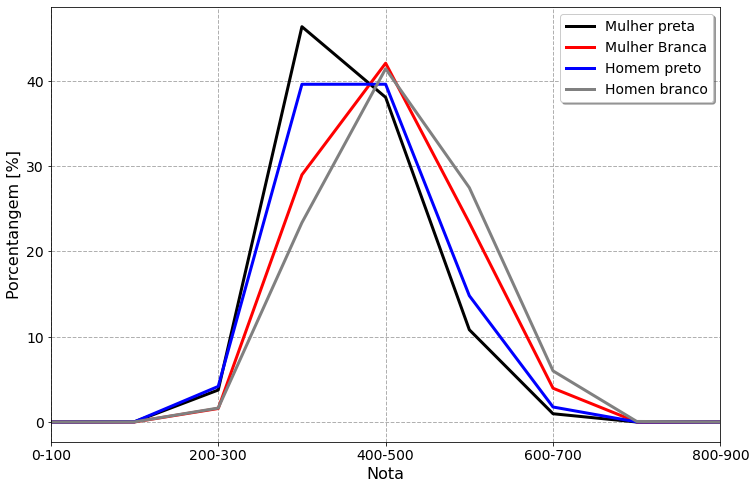

In [ ]:
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.figure(figsize=(12, 8))
plt.plot(cont_mulher_preta*100,label = 'Mulher preta',color = 'black',linewidth = 3)
plt.plot(cont_mulher_branca*100, label = 'Mulher Branca',color = 'red',linewidth = 3)
plt.plot(cont_homen_preto*100, label = 'Homem preto',color = 'blue',linewidth = 3)
plt.plot(cont_homen_branco*100, label = 'Homen branco',color = 'gray',linewidth = 3)

plt.xlim(0,8)
inter = np.arange(0,9,2)

x_lab= [x_label[0],x_label[2],x_label[4],x_label[6],x_label[8]]

ax = plt.gca()
ax.set_xticks(inter)
ax.set_xticklabels(x_lab)
plt.grid(linestyle='--', linewidth=1)

plt.legend(shadow=True, fontsize=14)
plt.ylabel('Porcentangem [%]',fontsize = 16)
plt.xlabel('Nota',fontsize = 16)
#plt.title('Porcentagem de alunos de alunos',fontsize = 18)
plt.show()

### <a name="secao_3.4"> 3.4  O tipo de escola que a pessoa estudo afeta o seu desempenho ?  </a>.


 
* Observação: As escolas serão avaliadas pelos tipos das suas dependências administrativas, pois são elas que determinam os seus investimentos.


* Ode

In [ ]:
def autolabel(rects):
      """Attach a text label above each bar in *rects*, displaying its height."""
      for rect in rects:
          height = rect.get_height()
          ax.annotate(np.format_float_positional(height,2),
                      xy=(rect.get_x() + rect.get_width() / 2, height),
                      xytext=(0, 3),  # 3 points vertical offset
                      textcoords="offset points", 
                      ha='center', va='bottom',size = 14)


In [ ]:
contagem = [42661,42661,6873,144735] # Essa contagem foi tirada do comando df['TP_DEPENDENCIA_ADM_ESC'].value_counts() [escoala 1, escola 2,escola 3, escola 4]

valore = df.groupby('TP_DEPENDENCIA_ADM_ESC').Nota_media.mean()
valores_std = df.groupby('TP_DEPENDENCIA_ADM_ESC').Nota_media.std()
valores_erro = valores_std/np.sqrt(contagem)

No handles with labels found to put in legend.


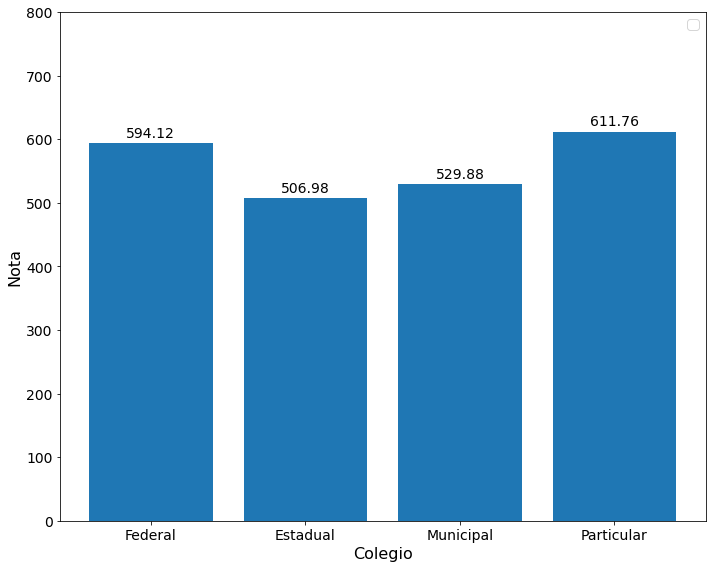

In [ ]:
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)
labels = ['Federal', 'Estadual','Municipal','Particular']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 8))
rects1 = ax.bar(x, valore)
#rects2 = ax.bar(x + width/2, valores_branco,width,label='Brancos')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Nota',fontsize = 16)
ax.set_xlabel('Colegio',fontsize = 16)
#ax.set_title('Relação das notas por colegios',fontsize = 18)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize = 14)

autolabel(rects1)
#autolabel(rects2)
ax.set_ylim(0,800)
fig.tight_layout()
plt.show()




In [ ]:
print("Qual é a diferença da nota das escolas particulares em relação às demais:")
print('Municipal :',np.mean(df['Nota_media'][df['TP_DEPENDENCIA_ADM_ESC'] == 4]) - np.mean(df['Nota_media'][df['TP_DEPENDENCIA_ADM_ESC'] == 3]))
print('Estadual  :',np.mean(df['Nota_media'][df['TP_DEPENDENCIA_ADM_ESC'] == 4]) - np.mean(df['Nota_media'][df['TP_DEPENDENCIA_ADM_ESC'] == 2]))
print('Federal   :',np.mean(df['Nota_media'][df['TP_DEPENDENCIA_ADM_ESC'] == 4]) - np.mean(df['Nota_media'][df['TP_DEPENDENCIA_ADM_ESC'] == 1]))

Qual é a diferença da nota das escolas particulares em relação às demais:
Municipal : 81.8734573793771
Estadual  : 104.77536676747775
Federal   : 17.64206902800288


* O desempenho dos colégios federais em relação aos particulares é mínimo. Será que essa diferença é causada por variação estatística dos dados?

In [ ]:
print('Particular:',np.std(df['Nota_media'][df['TP_DEPENDENCIA_ADM_ESC'] == 4])/np.sum(df['TP_DEPENDENCIA_ADM_ESC'] == 4))
print('Federal   :',np.std(df['Nota_media'][df['TP_DEPENDENCIA_ADM_ESC'] == 1])/np.sum(df['TP_DEPENDENCIA_ADM_ESC'] == 1))

Particular: 0.000532624272811352
Federal   : 0.0016690640330643942


* Claramente pelos resultados mostrados as escolas particulares apresentaram um maior desempenho dos demais. Porque elas tendem a ter um investimento em infraestrutura. Estudos apontados nas referências abaixo mostram que elas tendem a ter um maior desempenho.


* refêrencias: 


  * https://www.melhorescola.com.br/artigos/escola-publica-ou-escola-particular-entenda-a-diferenca-entre-os-dois-sistemas-de-ensino


  * https://familia.rededecisao.com.br/a-importancia-da-estrutura-fisica-da-escola/

  * https://escolasexponenciais.com.br/tendencias-e-metricas/qual-a-influencia-da-infraestrutura-escolar-no-aprendizado/

* Conforme foi visto, a infraestrutura interfere diretamente no desempenho dos alunos. Logo, será que alunos com a mesma infraestrutura mas com raças diferentes possuem o mesmo desempenho?

Erro da medida
TP_DEPENDENCIA_ADM_ESC
1.0    0.002854
2.0    0.000163
3.0    0.019262
4.0    0.001532
Name: TP_COR_RACA, dtype: float64
TP_DEPENDENCIA_ADM_ESC
1.0    0.003733
2.0    0.000311
3.0    0.022760
4.0    0.000800
Name: TP_COR_RACA, dtype: float64


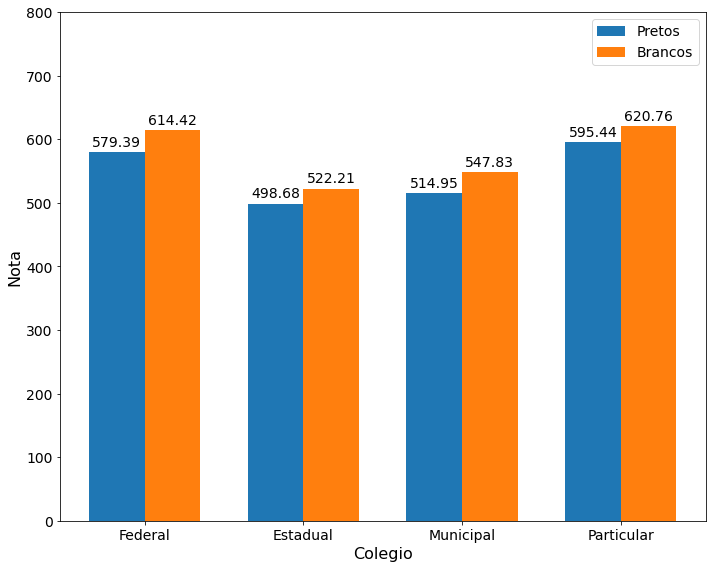

In [ ]:
valore_preto,valores_branco,valores_preto_std,valores_branco_std = valores_plot(df,'Nota_media','TP_DEPENDENCIA_ADM_ESC')
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)
labels = ['Federal', 'Estadual','Municipal','Particular']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 8))
rects1 = ax.bar(x - width/2, valore_preto,width,label='Pretos')
rects2 = ax.bar(x + width/2, valores_branco,width,label='Brancos')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Nota',fontsize = 16)
ax.set_xlabel('Colegio',fontsize = 16)
#ax.set_title('Relação das notas por colegios',fontsize = 18)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize = 14)

autolabel(rects1)
autolabel(rects2)
ax.set_ylim(0,800)
fig.tight_layout()
plt.show()




* Claramente mostra que mesmo com que alunos de raças diferentes tenham a mesma estrutura os alunos da raça branca apresentam um desempenho pior.
 
* Agora será calculado a diferença entre os alunos de raças diferentes mais que tenham a mesma estrutura.


In [ ]:
print('Escola particular :',np.mean(df['Nota_media'][(df['TP_DEPENDENCIA_ADM_ESC'] == 4) & (df['TP_COR_RACA'] == 1)]) - np.mean(df['Nota_media'][(df['TP_DEPENDENCIA_ADM_ESC'] == 4) & (df['TP_COR_RACA'] == 0)]))
print('Escola Municipal  :',np.mean(df['Nota_media'][(df['TP_DEPENDENCIA_ADM_ESC'] == 3) & (df['TP_COR_RACA'] == 1)]) - np.mean(df['Nota_media'][(df['TP_DEPENDENCIA_ADM_ESC'] == 3) & (df['TP_COR_RACA'] == 0)]))
print('Escola Estadual   :',np.mean(df['Nota_media'][(df['TP_DEPENDENCIA_ADM_ESC'] == 2) & (df['TP_COR_RACA'] == 1)]) - np.mean(df['Nota_media'][(df['TP_DEPENDENCIA_ADM_ESC'] == 2) & (df['TP_COR_RACA'] == 0)]))
print('Escola federais   :',np.mean(df['Nota_media'][(df['TP_DEPENDENCIA_ADM_ESC'] == 1) & (df['TP_COR_RACA'] == 1)]) - np.mean(df['Nota_media'][(df['TP_DEPENDENCIA_ADM_ESC'] == 1) & (df['TP_COR_RACA'] == 0)]))

Escola particular : 25.311053074653955
Escola Municipal  : 32.87680721485083
Escola Estadual   : 23.529923204913928
Escola federais   : 35.03391393429365


* Os resultados mostram que com alunos de mesma raça quando tem acesso a colégios de maior infraestrutura a sua nota evolui. Mas um ponto que vale destacar é que a diferença entre os alunos de raças diferentes não diminui quando o setor administrativo da escola muda. Isso evidencia que o desepenho pior dos alunos de raça preta em relação aos brancos não está interligado apenas com os colégios de setores administrativos diferentes, mas possivelmente a fatores sociais e econômicos. Por esse motivo agora será analisado o desempenho dos alunos segundo a renda das suas famílias.

### <a name="secao_3.5"> 3.5  Quanto maior a renda, maior o desempenho dos alunos? </a>.

In [ ]:
valores_preto,valores_branco,valores_preto_std,valores_branco_std = valores_plot(df,'Nota_media','Q006')

Erro da medida
Q006
0.0        0.002392
499.0      0.000422
1247.5     0.000519
1746.5     0.001789
2245.5     0.001602
2744.5     0.004395
3493.0     0.002779
4491.0     0.005859
5489.0     0.007100
6487.0     0.015467
7485.0     0.019687
8483.0     0.030026
9481.0     0.031754
10978.0    0.024816
13473.0    0.032822
17465.0    0.044497
20000.0    0.037917
Name: TP_COR_RACA, dtype: float64
Q006
0.0        0.010729
499.0      0.001559
1247.5     0.001078
1746.5     0.002378
2245.5     0.001820
2744.5     0.003757
3493.0     0.002289
4491.0     0.003772
5489.0     0.004275
6487.0     0.008181
7485.0     0.010195
8483.0     0.013347
9481.0     0.013650
10978.0    0.008610
13473.0    0.010374
17465.0    0.010292
20000.0    0.006636
Name: TP_COR_RACA, dtype: float64


In [ ]:
x_label = ['0','0-1','1-1.5','1.5-2',
           '2-2.5','2.5-3','3-4',
           '4-5','5-6','6-7','7-8' 
           ,'8-9','9-10','10-12'
           ,'12-15','15-20','>20']

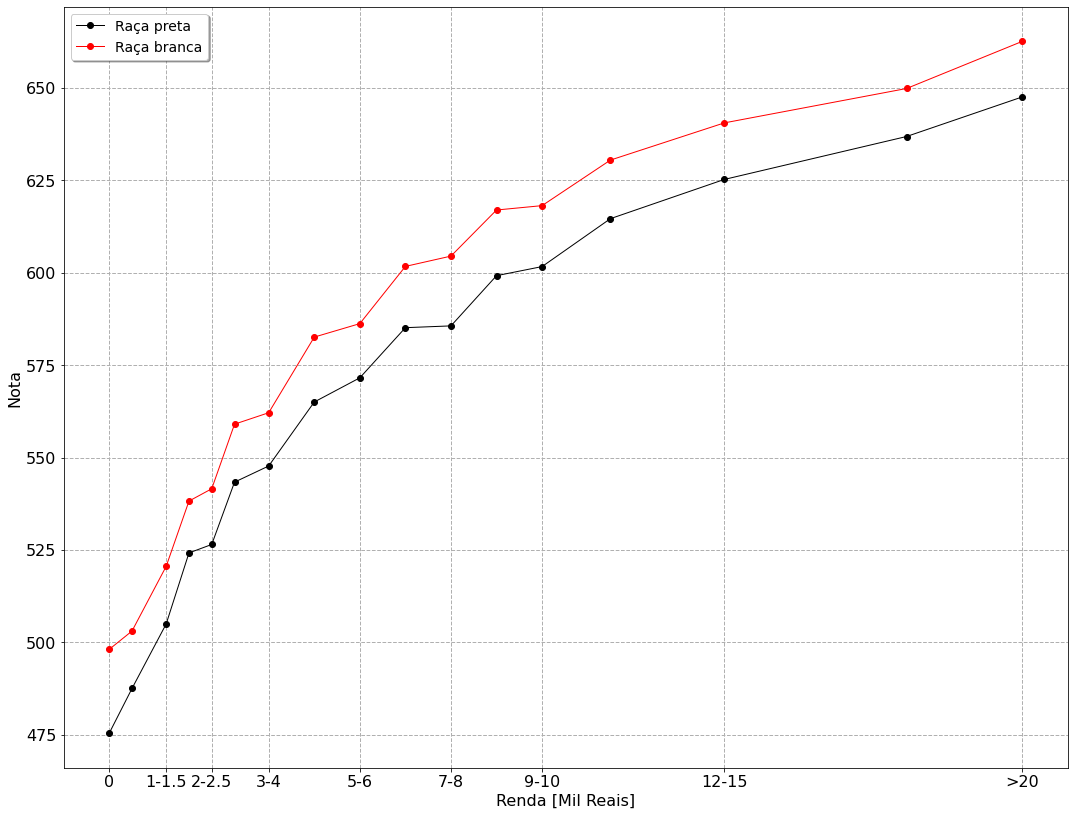

In [ ]:
plt.rc('ytick', labelsize=16)
plt.rc('xtick', labelsize=16)
plt.figure(figsize=(18, 14))
plt.plot(np.unique(df['Q006']),valores_preto,'o-',label = 'Raça preta',color = 'black',linewidth = 1)
plt.plot(np.unique(df['Q006']),valores_branco,'o-',label = 'Raça branca',color = 'red',linewidth = 1)



inter = np.unique(df['Q006'])

x_lab= [x_label[0],x_label[2],x_label[4],x_label[6],x_label[8],x_label[10],x_label[12],x_label[14],x_label[16]]


ax = plt.gca()
ax.set_xticks(inter[np.arange(0,17,2)])
ax.set_xticklabels(x_lab)
plt.grid(linestyle='--', linewidth=1)

plt.legend(shadow=True, fontsize=14)
plt.ylabel('Nota',fontsize = 16)
plt.xlabel('Renda [Mil Reais]',fontsize = 16)
#plt.title('Renda dos alunos por adimistrção dos colegios',fontsize = 18)
plt.show()

* Claramente o resultado mostrou evidência o fato que quanto maior a renda da família o aluno tende a tirar uma nota melhor.
 
* O resultado mostrado  é possível tirar conclusões interessantes. Sendo que uma delas é que o fator econômico influencia a nota dos alunos independentemente da sua raça. Mas os alunos de raça preta na média nunca apresentou uma nota melhor do que as nota média dos alunos de raça branca. 
 
* Um ponto que pode se destacar é que esse resultado evidencia que mesmo que os alunos de raças diferentes tenham a mesma estrutura, a renda é um fator que influencia nos resultados.

### <a name="secao_3.6"> 3.6  Escolaridade dos pais interfere na nota dos alunos?</a>.


In [ ]:
labels = ['Nunca estudou','4ª/5º','8ª/9º','Medio','Faculdade','Pós-gradução','Termino a Pós-gradução']

Erro da medida
Q001
0.0    0.002392
1.0    0.000613
2.0    0.000811
3.5    0.000953
4.0    0.000505
5.5    0.002840
6.0    0.005969
Name: TP_COR_RACA, dtype: float64
Q001
0.0    0.011350
1.0    0.001684
2.0    0.001555
3.5    0.001613
4.0    0.000659
5.5    0.001745
6.0    0.002562
Name: TP_COR_RACA, dtype: float64


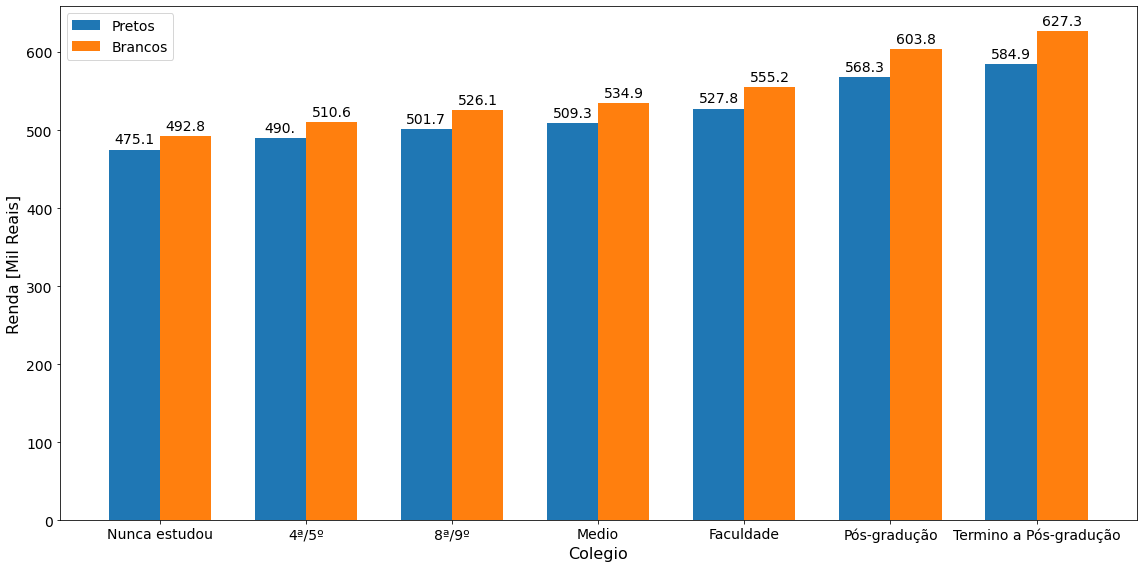

In [ ]:
valore_preto,valores_branco,valores_preto_std,valores_branco_std = valores_plot(df,'Nota_media','Q001')
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 8))
rects1 = ax.bar(x - width/2, valore_preto,width,label='Pretos')
rects2 = ax.bar(x + width/2, valores_branco,width,label='Brancos')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Renda [Mil Reais]',fontsize = 16)
ax.set_xlabel('Colegio',fontsize = 16)
#ax.set_title('Relação das notas pela escolaridade da mãe',fontsize = 18)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize = 14)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(np.format_float_positional(height,1),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points", 
                    ha='center', va='bottom',size = 14)


autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()




Erro da medida
Q002
0.0    0.004274
1.0    0.000919
2.0    0.000931
3.5    0.000875
4.0    0.000412
5.5    0.001891
6.0    0.002882
Name: TP_COR_RACA, dtype: float64
Q002
0.0    0.020685
1.0    0.002654
2.0    0.001959
3.5    0.001651
4.0    0.000611
5.5    0.001483
6.0    0.001829
Name: TP_COR_RACA, dtype: float64


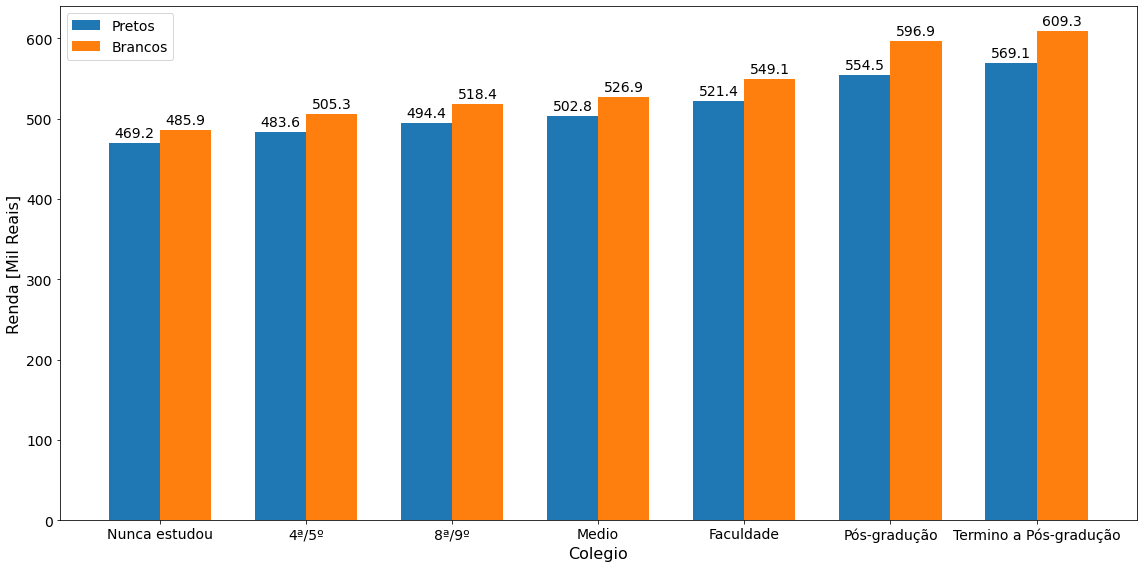

In [ ]:
valore_preto,valores_branco,valores_preto_std,valores_branco_std = valores_plot(df,'Nota_media','Q002')
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 8))
rects1 = ax.bar(x - width/2, valore_preto,width,label='Pretos')
rects2 = ax.bar(x + width/2, valores_branco,width,label='Brancos')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Renda [Mil Reais]',fontsize = 16)
ax.set_xlabel('Colegio',fontsize = 16)
#ax.set_title('Relação das notas pela escolaridade da pai',fontsize = 18)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize = 14)




autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()




* Os resultados exibidos mostram que claramente a família que o pai ou a mãe que tem no mínimo uma graduação recebe uma nota melhor.

 



### <a name="secao_3.7"> 3.7  O acesso a internet e ao um computador influência nos estudos ?</a>.

* Claramente nos resutados anterires foi visto que a renda inflência no desepenho dos alunos. Uma analise obvida é de que quanto maior a renda maior é a chance da pessoa ter acesso ao computador com internert. Para verificar se isso acontece de fato vamor olhar essa essa relação.

In [ ]:
x_label = ['0','0-1','1-1.5','1.5-2',
           '2-2.5','2.5-3','3-4',
           '4-5','5-6','6-7','7-8' 
           ,'8-9','9-10','10-12'
           ,'12-15','15-20','>20']

In [ ]:
ind = np.unique(df['Q026'])

In [ ]:
org  = np.argsort(df[df['Q026'] == ind[0]]['Q006'].value_counts().index)
v    = df[df['Q026'] == ind[0]]['Q006'].value_counts()

org  = np.argsort(df[df['Q026'] == ind[1]]['Q006'].value_counts().index)
v1    = df[df['Q026'] == ind[1]]['Q006'].value_counts()

org  = np.argsort(df[df['Q026'] == ind[2]]['Q006'].value_counts().index)
v2    = df[df['Q026'] == ind[2]]['Q006'].value_counts()

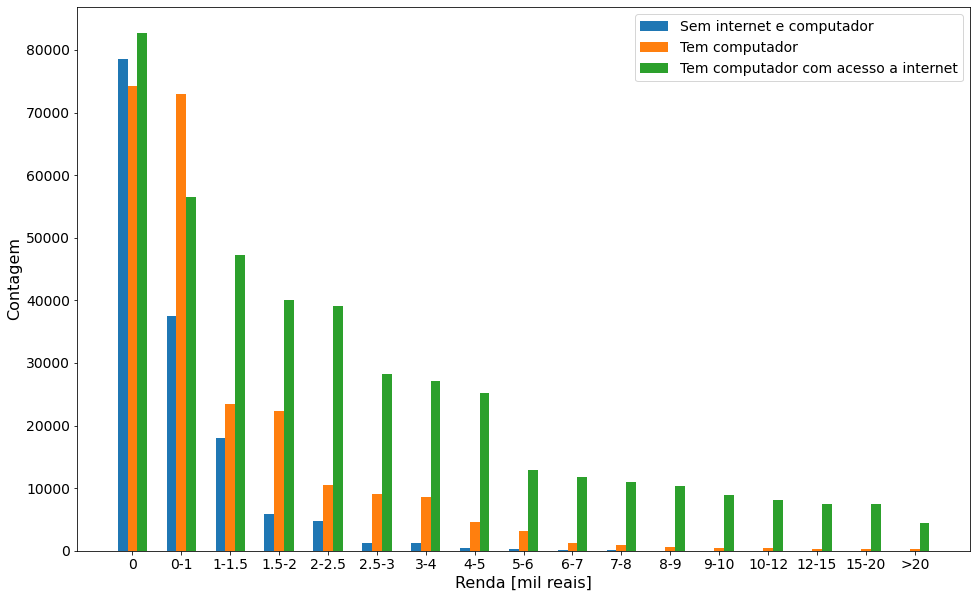

In [ ]:
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)
x = np.arange(len(x_label))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 10))
plt.bar(x-0.2, v, width,label ='Sem internet e computador') 
plt.bar(x, v1, width,label ='Tem computador') 
plt.bar(x+0.2, v2, width,label = 'Tem computador com acesso a internet')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Contagem',fontsize = 16)
ax.set_xlabel('Renda [mil reais]',fontsize = 16)
#ax.set_title('Contagem de pessoas que tem acesso ao computador com internet',fontsize = 18)
ax.set_xticks(x)
ax.set_xticklabels(x_label)
ax.legend(fontsize = 14)
plt.show()

* A relação mostrada afirma a hipótese levantada. E através dessa informação é visto que o número de usuários que não tem acesso a internet e ao um computador diminui drasticamente a partir da renda de  3493 reais.
 
* Por esse motivo só será visto o quanto interfere se uma pessoa tem acesso a um computador com internet até as pessoas com renda de 2245 mil reais.

In [ ]:
df_c = df.copy()

In [ ]:
df_c = df_c[df_c['Q006'] <= 2245.5]

In [ ]:
org  = np.argsort(df_c[df_c['Q026'] == ind[0]]['Q006'].value_counts().index)


In [ ]:
v  = df_c[df_c['Q026'] == 0].groupby('Q006').Nota_media.mean()
v1 = df_c[df_c['Q026'] == 1].groupby('Q006').Nota_media.mean()
v2 = df_c[df_c['Q026'] == 2].groupby('Q006').Nota_media.mean()

In [ ]:
x_label = ['0','0-1','1-1.5','1.5-2',
           '2-2.5']

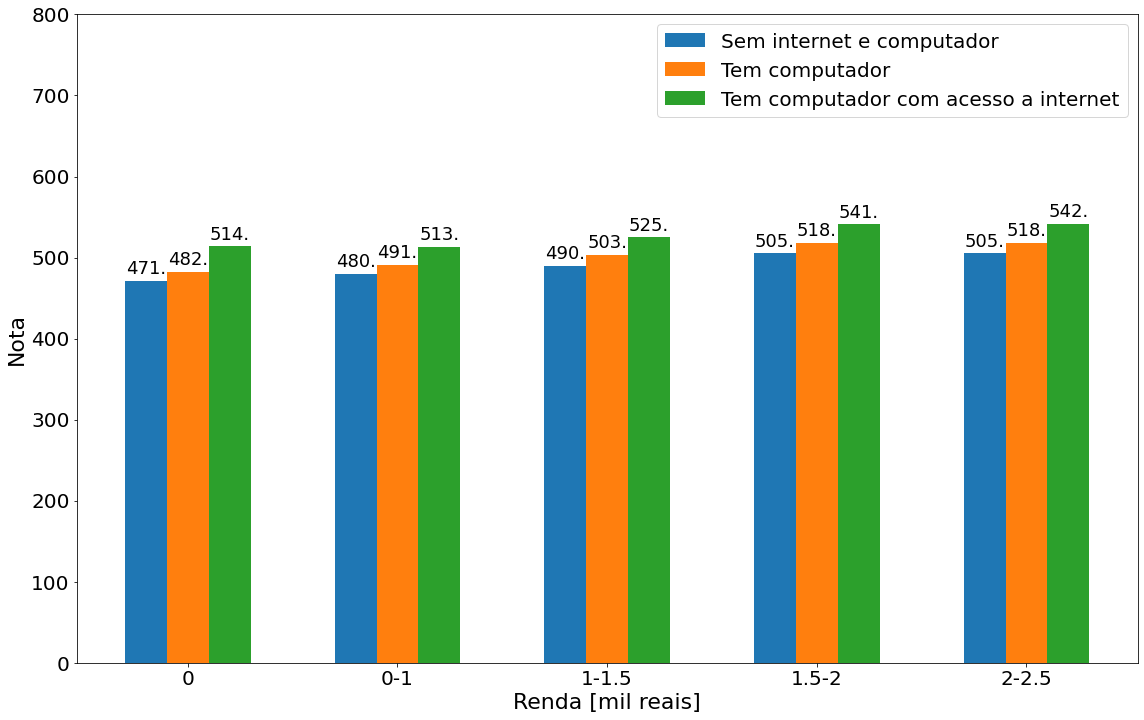

In [ ]:
plt.rc('ytick', labelsize=20)
plt.rc('xtick', labelsize=20)
x = np.arange(len(x_label))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 10))
rects1 = ax.bar(x-0.2, np.round(v), width,label ='Sem internet e computador') 
rects2 = ax.bar(x, np.round(v1), width,label ='Tem computador') 
rects3 = ax.bar(x+0.2, np.round(v2), width,label = 'Tem computador com acesso a internet')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Nota',fontsize = 22)
ax.set_xlabel('Renda [mil reais]',fontsize = 22)
#ax.set_title('Nota das pessoas que tem acesso ao computador com internet',fontsize = 18)
ax.set_xticks(x)
ax.set_xticklabels(x_label)
ax.legend(fontsize = 20)


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
fig.tight_layout()
plt.ylim(0,800)
plt.show()

